#Gestão de Recursos Humanos em uma Software House

Neste projeto, conduzimos uma análise exploratória de dados (EDA) para entender os desafios e oportunidades na gestão de recursos humanos em uma software house.
<br><br>
No dataset "recursos", com dados de 560 funcionários de 2020 a 2024, há as seguintes variáveis iniciais:

- Data_Contratacao: Registra a data exata em que o funcionário foi contratado pela empresa
- Data_Desligamento: Data (ou texto, se o funcionário ainda estiver na empresa)
- Meses_de_Servico: Representa a quantidade de meses completos que o funcionário trabalhou na empresa
- Idade: Idade do funcionário no momento da contratação
- Pontuacao_Desempenho: Representa a avaliação quantitativa do desempenho do funcionário em um determinado período
- Satisfacao_Trabalho: Indica o nível de satisfação do funcionário com seu trabalho
- Nivel_Cargo: Nível hierárquico do cargo
- Salario: Salário bruto mensal do funcionário
- Horas_Extras: Quantidade de horas extras trabalhadas pelo funcionário em um determinado período
- Desligamento: Indica se o funcionário ainda está na empresa ou se já foi desligado

## Insights da Análise

### 1. Correlações entre Variáveis
- Existe uma forte correlação positiva entre salário e idade, sugerindo que funcionários mais velhos tendem a ter salários mais altos.
- A relação entre pontuação de desempenho e salário é baixa, indicando que outros fatores além do desempenho influenciam o salário dos funcionários.
- A correlação entre idade e satisfação no trabalho é baixa, indicando que a idade não é um fator determinante na satisfação no trabalho.
<br><br>

###2. Turnover e riscos
Existe um turnover significativo de 55% na software house, que pode impactar negativamente o orçamento e a lucratividade da empresa. Para além disso, pode afetar negativamente o moral dos funcionários remanescentes e minar a cultura organizacional e tambpem a reputação da empresa no mercado de trabalho. Candidatos em potencial podem ver a alta rotatividade como um sinal de problemas internos na empresa, tornando mais difícil atrair e reter talentos qualificados.
<br><br>
A média de permanência em 18 meses indica custos significativos em processos de contratação e desligamento, além de perdas associadas à interrupção de projetos em andamento e na curva de aprendizado da equipe.
<br> <br>
Isso pode levar a uma diminuição da produtividade e eficiência da equipe que permanece, afetando a entrega de projetos dentro do prazo e do orçamento.
<br><br>
###3. Sugestões
- Melhoria do processo de recrutamento e seleção para identificar candidatos que se encaixem melhor na cultura e nos valores da empresa;
- Investimento em programas de desenvolvimento profissional e oportunidades de crescimento para incentivar a progressão na carreira e aumentar a satisfação dos funcionários;
- Avaliação e melhorias nas práticas de gestão e comunicação para garantir um ambiente de trabalho positivo e colaborativo;
- Os dados também mostram que cargos mais altos (com salários também), nível de satisfação e notas altas de desempenho não são critérios de permanência. Isso ressalta a importância da retenção de talentos não somente por meio de salários altos, mas também através de um ambiente sadio e organizado, com relações valorizadas e senso de pertencimento.

---


In [2]:
#bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#carregando o dataset
recursos = pd.read_csv('https://raw.githubusercontent.com/JoiceO/python/master/Rotatividade%20RH/Rotatividade%20RH_base_dados.csv')

In [4]:
recursos.head()

,Data_Contratacao,Data_Desligamento,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento
0,2024-02-14,NaN,3,24,"2,06678751","2,043644213",Pleno,"4994,41","15,4652",0
1,2023-11-16,2024-05-14,6,43,"3,256257441","1,711718731",Sênior,"8798,34","19,0366",1
2,2023-11-16,NaN,6,45,"4,8277319","3,480214321",Sênior,"8891,02","13,3264",0
3,2023-05-20,NaN,12,31,"1,453943661","1,617558399",Pleno,"7606,22","14,2097",0
4,2022-07-24,NaN,22,37,"2,088917444","2,763389999",Sênior,"9236,03","11,0597",0


#Limpeza

In [57]:
#informacoes sobre os dados e ausencias
recursos.info()

#nao ha dados ausentes. Coluna "Data_Desligamento" tem valores a menos por que significa que as pessoas permanecem empregadas (total de 506)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Data_Contratacao      650 non-null    datetime64[ns]
 1   Data_Desligamento     144 non-null    datetime64[ns]
 2   Meses_de_Servico      650 non-null    int64         
 3   Idade                 650 non-null    int64         
 4   Pontuacao_Desempenho  650 non-null    float64       
 5   Satisfacao_Trabalho   650 non-null    float64       
 6   Nivel_Cargo           650 non-null    object        
 7   Salario               650 non-null    float64       
 8   Horas_Extras          650 non-null    float64       
 9   Desligamento          650 non-null    int64         
 10  Ano_Desligamento      144 non-null    float64       
 11  Ano_Contratacao       650 non-null    int32         
dtypes: datetime64[ns](2), float64(5), int32(1), int64(3), object(1)
memory usage: 

In [58]:
#convertendo colunas de data para o tipo datetime
recursos['Data_Contratacao'] = pd.to_datetime(recursos['Data_Contratacao'])
recursos['Data_Desligamento'] = pd.to_datetime(recursos['Data_Desligamento'])

In [59]:
#covertendo colunas em ponto flutuante
colunas_numericas = ['Pontuacao_Desempenho', 'Satisfacao_Trabalho', 'Salario', 'Horas_Extras']
recursos[colunas_numericas] = recursos[colunas_numericas].replace(',', '.', regex=True).astype(float)

In [60]:
#verificando execucao das alteracoes acima
recursos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Data_Contratacao      650 non-null    datetime64[ns]
 1   Data_Desligamento     144 non-null    datetime64[ns]
 2   Meses_de_Servico      650 non-null    int64         
 3   Idade                 650 non-null    int64         
 4   Pontuacao_Desempenho  650 non-null    float64       
 5   Satisfacao_Trabalho   650 non-null    float64       
 6   Nivel_Cargo           650 non-null    object        
 7   Salario               650 non-null    float64       
 8   Horas_Extras          650 non-null    float64       
 9   Desligamento          650 non-null    int64         
 10  Ano_Desligamento      144 non-null    float64       
 11  Ano_Contratacao       650 non-null    int32         
dtypes: datetime64[ns](2), float64(5), int32(1), int64(3), object(1)
memory usage: 

#EDA

## Distribuição das variáveis

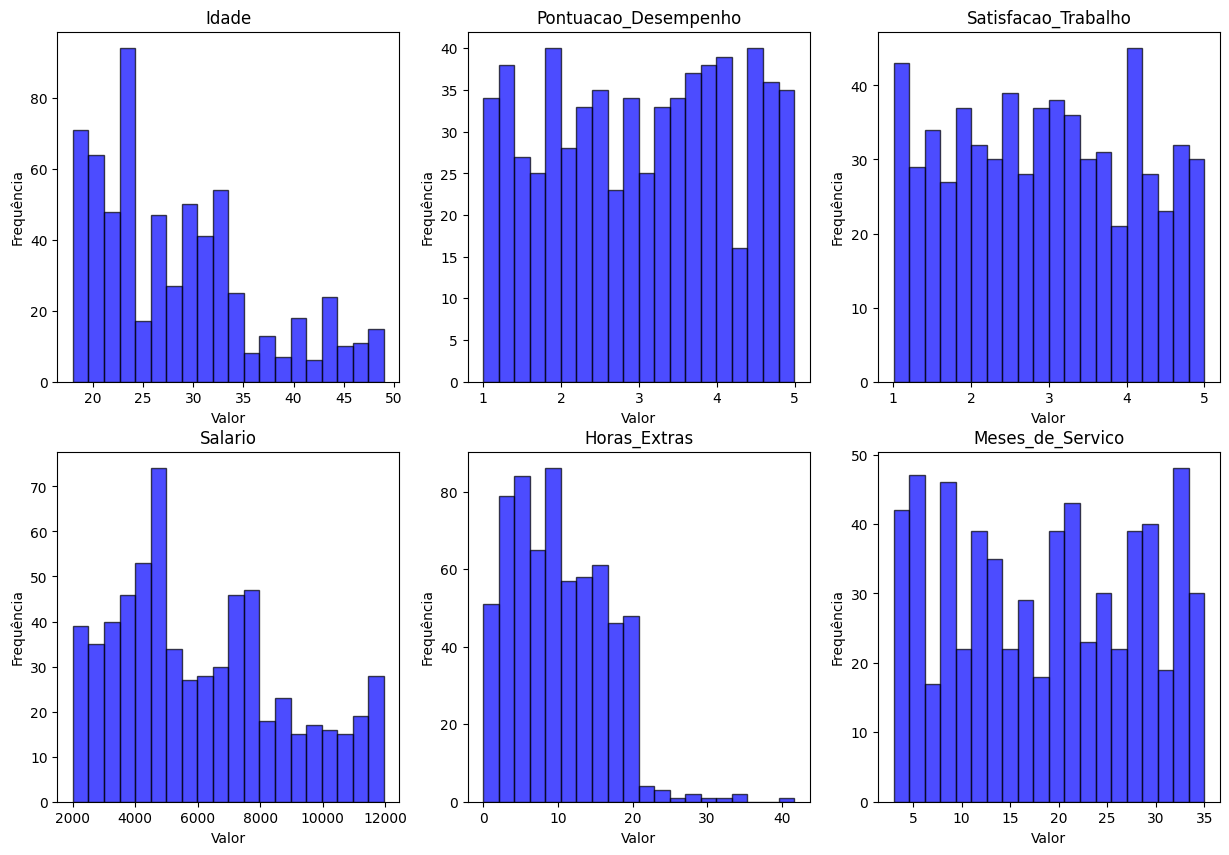

In [56]:
#variaveis para verificar distribuicao dos 650 funcionarios
distribuicao = ['Idade', 'Pontuacao_Desempenho', 'Satisfacao_Trabalho', 'Salario', 'Horas_Extras', 'Meses_de_Servico']
#ajuste para plotar em 2 linhas para 3 colunas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
#iterar a cada variavel selecionada e plotar os histogramas
for col, ax in zip(distribuicao, axes.flatten()):
    ax.hist(recursos[col], bins=20, color='blue', edgecolor='black', alpha=0.7)
    ax.set_title(col)
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frequência')
plt.show()

In [27]:
#estatistica basica das colunas numericas
recursos.describe()

,Data_Contratacao,Data_Desligamento,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Salario,Horas_Extras,Desligamento,Ano_Desligamento,Ano_Contratacao
count,650,144,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,144.0,650.000000
mean,2022-10-31 06:38:46.153846272,2024-05-14 00:00:00,18.690769,28.349231,3.027463,2.940577,6131.587062,10.098864,0.221538,2024.0,2022.293846
min,2021-06-29 00:00:00,2024-05-14 00:00:00,3.000000,18.000000,1.000242,1.002868,2004.500000,0.003700,0.000000,2024.0,2021.000000
25%,2022-02-24 00:00:00,2024-05-14 00:00:00,10.000000,22.000000,1.988753,1.968571,4023.752500,4.978000,0.000000,2024.0,2022.000000
50%,2022-10-22 00:00:00,2024-05-14 00:00:00,19.000000,27.000000,3.058911,2.923458,5562.950000,9.413500,0.000000,2024.0,2022.000000
75%,2023-07-19 00:00:00,2024-05-14 00:00:00,27.000000,33.000000,4.022709,3.964356,7814.480000,14.749300,0.000000,2024.0,2023.000000
max,2024-02-14 00:00:00,2024-05-14 00:00:00,35.000000,49.000000,4.992102,4.999415,11957.290000,41.638400,1.000000,2024.0,2024.000000
std,NaN,NaN,9.652262,8.014983,1.174226,1.148514,2689.075566,6.242404,0.415602,0.0,0.871458


##Permanência, ciclos e turnover

In [21]:
#media de permanencia na empresa
media_servico = int(recursos['Meses_de_Servico'].mean())
print(f'Tempo Médio de Permanência: {media_servico} meses')

Tempo Médio de Permanência: 18 meses


###Ciclo de rotatividade


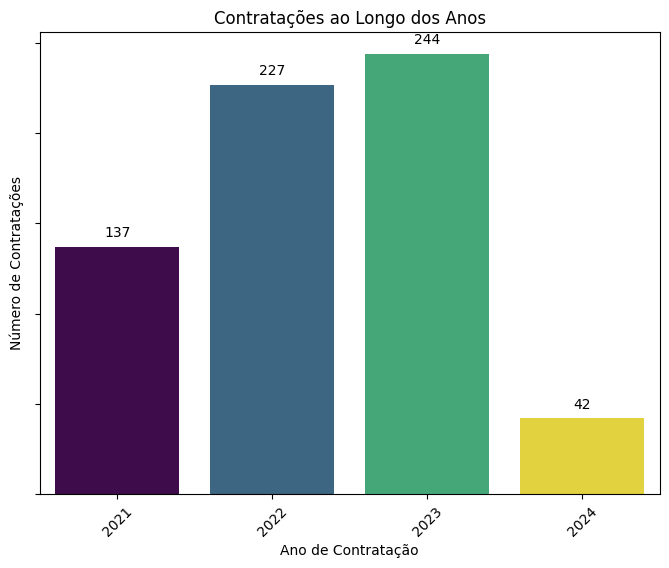

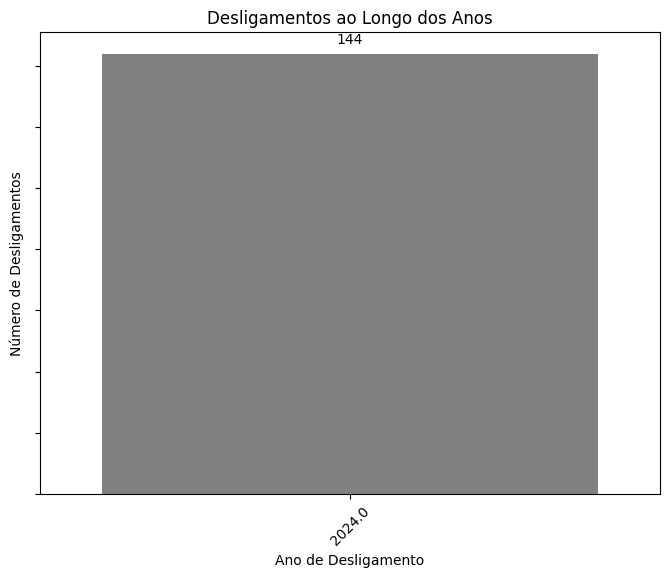

In [53]:
#a partir das colunas de datas, adicionar novas colunas em formato de ano para visualizar tendencia temporal
recursos['Ano_Contratacao'] = recursos['Data_Contratacao'].dt.year
recursos['Ano_Desligamento'] = recursos['Data_Desligamento'].dt.year


##incluir rotulos nas barras
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
##contratacoes/ano
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=recursos, x='Ano_Contratacao', hue='Ano_Contratacao', palette='viridis', legend=False)
add_labels(ax)
ax.set(yticklabels=[])  #sem rotulos em Y
plt.title('Contratações ao Longo dos Anos')
plt.xlabel('Ano de Contratação')
plt.ylabel('Número de Contratações')
plt.xticks(rotation=45)
plt.show()

##desligamentos/ano
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=recursos, x='Ano_Desligamento', color='gray', legend=False)
add_labels(ax)
ax.set(yticklabels=[])  #sem rotulos em Y
plt.title('Desligamentos ao Longo dos Anos')
plt.xlabel('Ano de Desligamento')
plt.ylabel('Número de Desligamentos')
plt.xticks(rotation=45)
plt.show()

In [23]:
recursos["Data_Desligamento"] = pd.to_datetime(recursos["Data_Desligamento"])
recursos["Ano_Desligamento"] = recursos["Data_Desligamento"].dt.year
rotatividade = recursos.groupby("Ano_Desligamento").size()
print("Ciclos de rotatividade:")
print(rotatividade)

Ciclos de rotatividade:
Ano_Desligamento
2024.0    144
dtype: int64


Com os valores e gráficos acima, é possível chegar a duas respostas: ou aconteceu uma demissão em massa em 2024 (desligando quase 23% do total de pessoas) ou a planilha fornecida estava com filtro ativo para mostrar somente demissões realizadas em 2024.

###Turnover

In [22]:
#numero de desligamentos
desligamentos = recursos['Data_Desligamento'].notna().sum()

#determinando o inicio e o fim do periodo a ser analisado
inicio_periodo = recursos['Data_Contratacao'].min()
fim_periodo = recursos['Data_Desligamento'].max()

#numero de funcionarios no inicio e no fim deste perioodo
funcionarios_inicio = (recursos['Data_Contratacao'] <= inicio_periodo).sum()
funcionarios_fim = (recursos['Data_Desligamento'].isna() | (recursos['Data_Desligamento'] > fim_periodo)).sum()

#meddia do numero de funcionarios
media_funcionarios = (funcionarios_inicio + funcionarios_fim) / 2

#taxa de turnover
taxa_turnover = desligamentos / media_funcionarios
print(f'Taxa de turnover: {taxa_turnover:.2%}')

Taxa de turnover: 54.96%


##Riscos
Funcionários Plenos e Sêniores com alto desempenho e alta satisfação no trabalho apresentam maior tempo de permanência?

In [66]:
#mediana de desempenho e satisfacao
mediana_desempenho = recursos['Pontuacao_Desempenho'].median()
mediana_satisfacao = recursos['Satisfacao_Trabalho'].median()

#adicionar colunas de alto desempenho e alta satisfação
recursos['Alto_Desempenho'] = recursos['Pontuacao_Desempenho'] > mediana_desempenho
recursos['Alta_Satisfacao'] = recursos['Satisfacao_Trabalho'] > mediana_satisfacao

#filtro para  Plenos e Seniores com alto desempenho e alta satisfacao
perfil_risco = recursos[(recursos['Nivel_Cargo'].isin(['Pleno', 'Sênior'])) &
                        (recursos['Alto_Desempenho']) &
                        (recursos['Alta_Satisfacao'])]

#tempo medio de permanencia para o perfil de risco e para outros funcionarios
permanencia_perfil_risco = perfil_risco['Meses_de_Servico'].mean()
permanencia_outros = recursos[~((recursos['Nivel_Cargo'].isin(['Pleno', 'Sênior'])) &
                                      (recursos['Alto_Desempenho']) &
                                      (recursos['Alta_Satisfacao']))]['Meses_de_Servico'].mean()

print(f'Tempo médio de permanência para funcionários Plenos e Sêniores com alto desempenho e alta satisfação: {permanencia_perfil_risco:.2f} meses')
print(f'Tempo médio de permanência para outros funcionários: {permanencia_outros:.2f} meses')


Tempo médio de permanência para funcionários Plenos e Sêniores com alto desempenho e alta satisfação: 18.59 meses
Tempo médio de permanência para outros funcionários: 18.71 meses


##Correlações

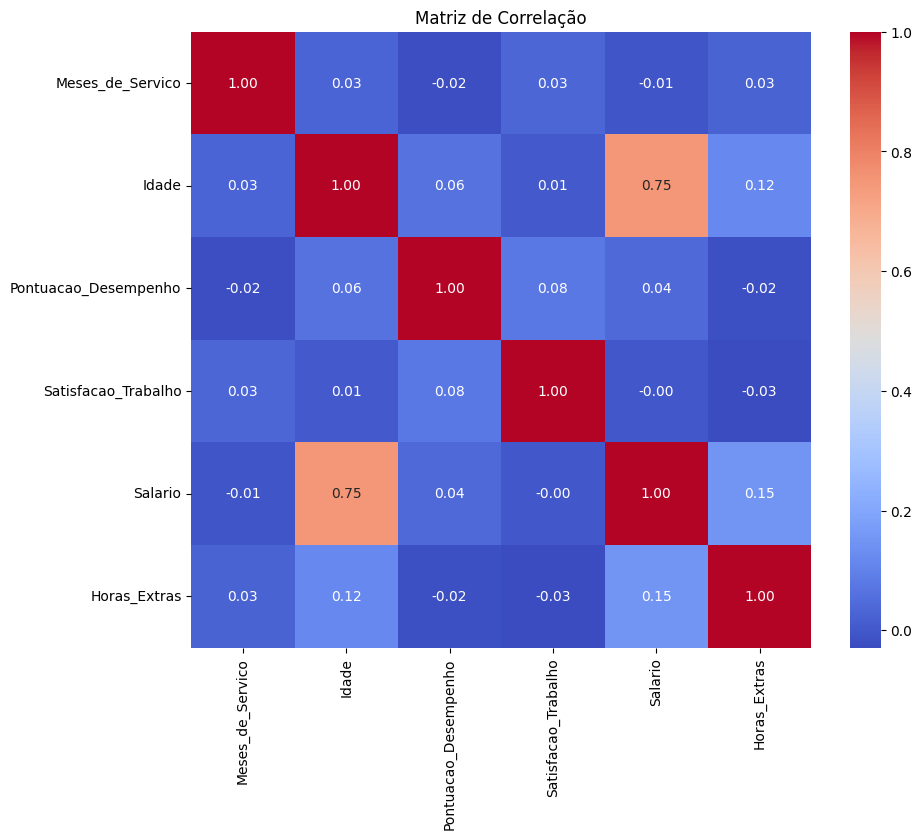

In [72]:
# Matriz de correlacao
variaveis = ['Meses_de_Servico', 'Idade', 'Pontuacao_Desempenho', 'Satisfacao_Trabalho', 'Salario', 'Horas_Extras']
#plotando
plt.figure(figsize=(10, 8))
sns.heatmap(recursos[variaveis].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

Quanto mais próximo de 1 ou -1, mais forte é a correlação. Um valor próximo a 0 indica uma correlação fraca ou nula.
<br><br>
Com a matriz acima, podemos notar alguns resultados:
Esses valores de correlação indicam a força e direção da relação entre as variáveis ​​listadas. Aqui estão algumas interpretações e insights com base nesses valores:

1. **Salário e Idade (0.75)**:
   - Existe uma forte correlação positiva entre salário e idade. Isso sugere que, em geral, quanto mais velho um funcionário, maior tende a ser seu salário. Isso pode refletir aumento de experiência, qualificação ou responsabilidade ao longo da carreira.

2. **Pontuação de Desempenho e Salário (0.04)**:
   - Essa correlação é muito baixa, indicando uma relação praticamente inexistente entre a pontuação de desempenho e o salário. Isso pode sugerir que outros fatores além do desempenho, como negociações salariais, políticas da empresa ou antiguidade, influenciam mais fortemente o salário dos funcionários.

3. **Pontuação de Desempenho e Idade (0.06)**:
   - A correlação é baixa, o que indica uma relação fraca entre a pontuação de desempenho e a idade. Isso pode sugerir que o desempenho no trabalho não está fortemente ligado à idade dos funcionários.

4. **Idade e Satisfação no Trabalho (0.01)**:
   - A correlação é muito baixa, o que sugere que não há uma relação significativa entre a idade dos funcionários e sua satisfação no trabalho. Isso indica que a satisfação no trabalho pode depender mais de outros fatores, como cultura organizacional, tipo de trabalho ou relacionamentos interpessoais.

5. **Pontuação de Desempenho e Satisfação no Trabalho (0.08)**:
   - A correlação é modesta, indicando uma relação positiva fraca entre a pontuação de desempenho e a satisfação no trabalho. Isso sugere que funcionários com melhor desempenho tendem a estar um pouco mais satisfeitos, mas outros fatores também podem influenciar fortemente a satisfação no trabalho.

6. **Salário e Satisfação no Trabalho (-0.00)**:
   - A correlação é próxima de zero, o que sugere uma falta de relação entre salário e satisfação no trabalho. Isso pode ser surpreendente, pois geralmente se espera que um salário mais alto esteja associado a uma maior satisfação no trabalho. No entanto, outros fatores além do salário podem influenciar a satisfação no trabalho, como ambiente de trabalho, reconhecimento e oportunidades de crescimento.

###Checando relação do desligamento com outras variáveis

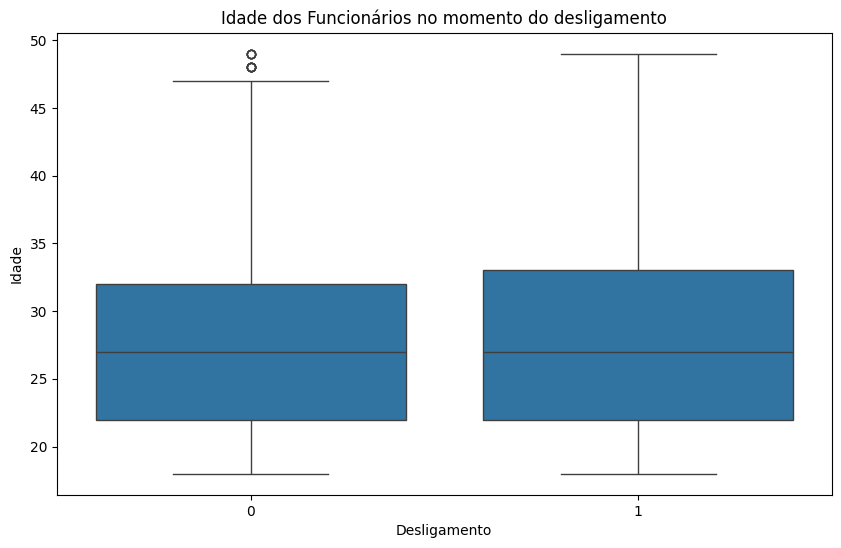

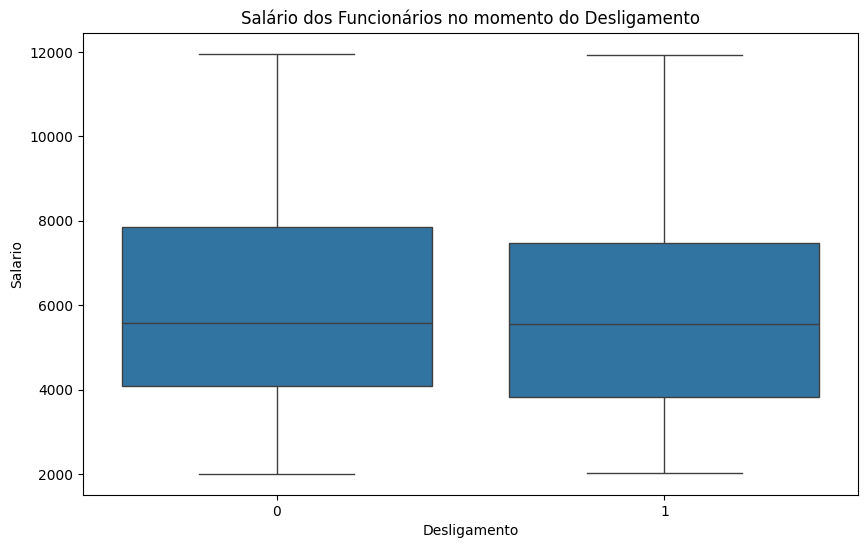

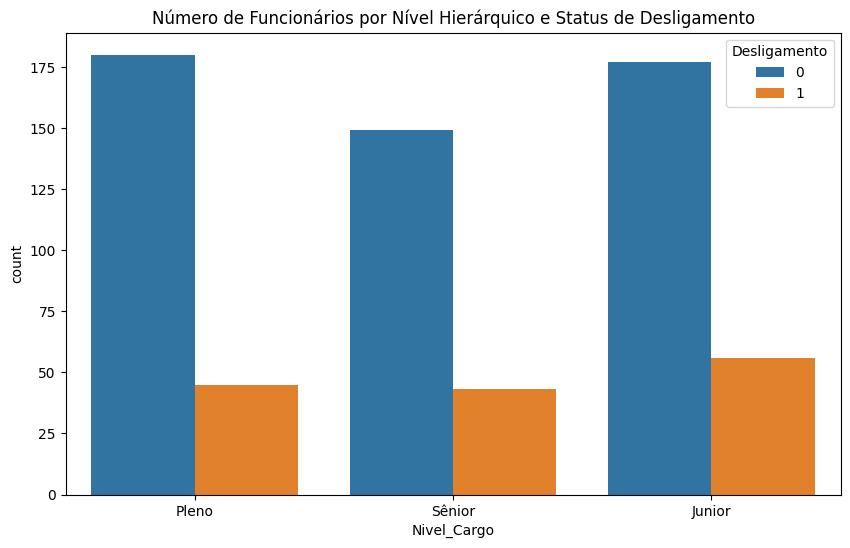

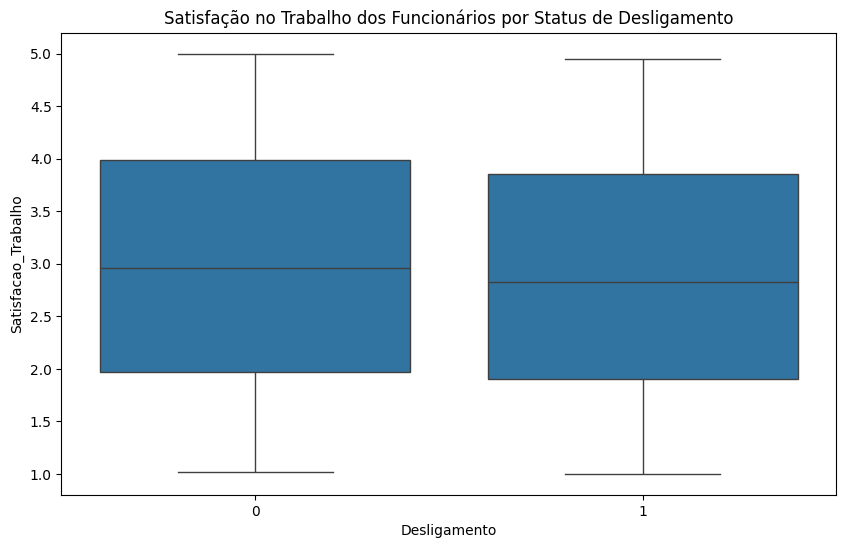

In [110]:
#boxplot para idade
plt.figure(figsize=(10, 6))
sns.boxplot(x='Desligamento', y='Idade', data=recursos)
plt.title('Idade dos Funcionários no momento do desligamento')
plt.show()

#boxplot para salario
plt.figure(figsize=(10, 6))
sns.boxplot(x='Desligamento', y='Salario', data=recursos)
plt.title('Salário dos Funcionários no momento do Desligamento')
plt.show()

#grafico de barras para nivel hierarquico
plt.figure(figsize=(10, 6))
sns.countplot(x='Nivel_Cargo', hue='Desligamento', data=recursos)
plt.title('Número de Funcionários por Nível Hierárquico e Status de Desligamento')
plt.show()

#boxplot para satisfacao no trabalho
plt.figure(figsize=(10, 6))
sns.boxplot(x='Desligamento', y='Satisfacao_Trabalho', data=recursos)
plt.title('Satisfação no Trabalho dos Funcionários por Status de Desligamento')
plt.show()